In [68]:
import pprint
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.manifold import TSNE
import torch
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from gensim.models import Word2Vec as word2vec
from collections import OrderedDict

In [42]:
G = nx.Graph() # 無向グラフ

node_list = list(range(55))
#ノードのラベルを1から５５にする
node_list = [node+1 for node in node_list]

# nodeデータの追加
G.add_nodes_from(node_list)

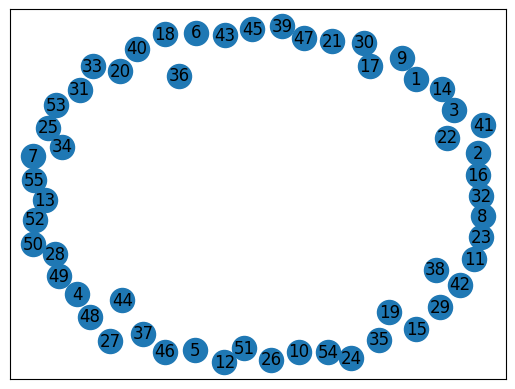

In [43]:
# グラフの描画
nx.draw_networkx(G)
plt.show()

In [44]:
#1-8(緑) 九州地方
G.add_edge(1,3)
G.add_edge(3,2)
G.add_edge(6,3)
G.add_edge(4,6)
G.add_edge(6,7)
G.add_edge(7,8)
G.add_edge(8,5)
G.add_edge(3,8)

In [45]:
#9-20(黒) 中国地方
G.add_edge(6,12)
G.add_edge(7,9)
G.add_edge(8,11)
G.add_edge(12,15)
G.add_edge(9,10)
G.add_edge(11,13)
G.add_edge(15,20)
G.add_edge(10,18)
G.add_edge(13,16)
G.add_edge(14,16)
G.add_edge(18,19)
G.add_edge(16,17)

In [46]:
#20-30(ピンク) 近畿、中部地方
G.add_edge(20,21)
G.add_edge(19,21)
G.add_edge(17,21)
G.add_edge(17,24)
G.add_edge(21,24)
G.add_edge(21,22)
G.add_edge(24,26)
G.add_edge(22,25)
G.add_edge(25,30)
G.add_edge(29,30)
G.add_edge(26,29)

# # 大阪に計算機を追加
# for i in range(56, 194):
#     G.add_edge(21,i)

# # 名古屋に計算機を追加
# for i in range(194, 241):
#     G.add_edge(29,i)

In [47]:
#30-37(茶色) 関東地方
G.add_edge(22,23)
G.add_edge(23,27)
G.add_edge(27,28)
G.add_edge(28,36)
G.add_edge(36,35)
G.add_edge(35,34)
G.add_edge(31,34)
G.add_edge(30,31)
G.add_edge(29,31)
G.add_edge(26,32)
G.add_edge(32,33)
G.add_edge(33,37)
G.add_edge(34,37)

# # 東京に計算機を追加
# for i in range(241, 601):
#     G.add_edge(37,i)

In [48]:
#37-43(青色) 東北地方
G.add_edge(37,38)
G.add_edge(38,41)
G.add_edge(40,41)
G.add_edge(39,40)
G.add_edge(35,39)
G.add_edge(36,43)
G.add_edge(42,43)
G.add_edge(40,42)
G.add_edge(41,42)

In [49]:
#43-49(紫色) 東北
G.add_edge(43,44)
G.add_edge(44,45)
G.add_edge(45,46)
G.add_edge(42,46)
G.add_edge(46,49)
G.add_edge(48,49)
G.add_edge(47,48)
G.add_edge(44,47)

In [50]:
#50-55(赤色) 北海道地方
G.add_edge(43,52)
G.add_edge(50,51)
G.add_edge(51,54)
G.add_edge(54,55)
G.add_edge(53,55)
G.add_edge(52,53)
G.add_edge(52,51)
G.add_edge(50,52)
G.add_edge(50,48)
G.add_edge(51,49)

In [51]:
pos = nx.spring_layout(G) 

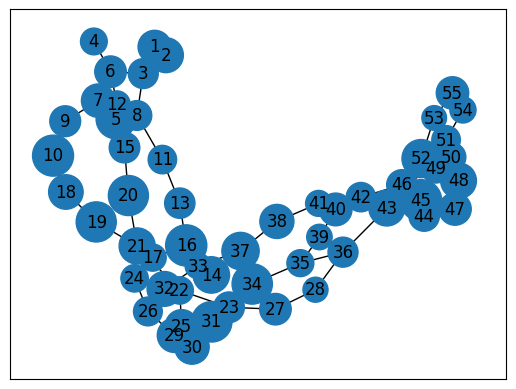

In [52]:
# test = [1, 2, 3, 4, 5]
for node in G.nodes:
    node_size_random = random.randint(300, 900)
    G.add_node(node, size=node_size_random)
    # if node in test:
    #     G.add_node(node, size=300)
    # else:
    #     G.add_node(node, size=300)

# nx.draw(G, node_size=[node['size'] for node in G.nodes.values()])
nx.draw_networkx(G, pos, with_labels=True, node_size=[node['size'] for node in G.nodes.values()])

In [53]:
nx.write_edgelist(G, "japanese_network.edgelist", data=False)

In [54]:
def make_random_walks(G, num_walk, length_of_walk):
    #ランダムウォークで歩いたノードを入れるlistを生成
    paths = list()
    #ランダムウォークを擬似的に行う
    for i in range(num_walk):
        node_list = list(G.nodes())
        for node in node_list:
            now_node = node
            #到達したノードを追加する用のリストを用意する
            path = list()
            path.append(str(now_node))
            for j in range(length_of_walk):
                #次に到達するノードを選択する
                next_node = random.choice(list(G.neighbors(now_node)))
                #リストに到達したノードをリストに追加する
                path.append(str(next_node))
                #今いるノードを「現在地」とする
                now_node = next_node
            #ランダムウォークしたノードをリストに追加
            paths.append(path)
        #訪れたノード群を返す
    return paths

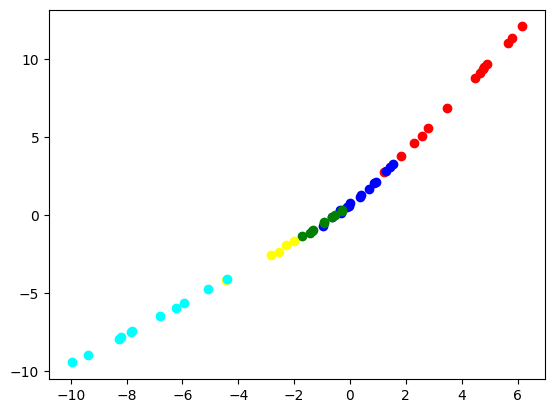

In [55]:
walking = make_random_walks(G, 2000, 40)

#sizeとiterではなく、vector_sizeとepochsと指定
model = word2vec(walking, min_count = 0, vector_size = 2, window = 15, workers = 1)

x = list()
y = list()
node_list = list()
colors = list()
color_numbers = list()
node_numbers = list()
node_sizes = list()

fig, ax = plt.subplots()
delimiter_layer_list = [0,15,30,40,45,55]

for node in G.nodes:    
    #int型のままではイテレートできないので、string型に変換する
    vector = model.wv[str(node)]  
    x.append(vector[0])
    y.append(vector[1])
    node_numbers.append(int(node))
    node_sizes.append(G.nodes[node]['size'])

    #注釈として、ノードの番号を追記する
    #座標(x,y)は(vector[0],vector[1])を指定
    #ax.annotate(str(node), (vector[0], vector[1]))
    if int(node) < delimiter_layer_list[1]:
        colors.append("red")
        color_numbers.append(0)
        
    elif int(node) < delimiter_layer_list[2] or (int(node) >= 56 and int(node) <= 193):
        colors.append("blue")
        color_numbers.append(1)
    
    elif int(node) < delimiter_layer_list[3] or (int(node) >= 194 and int(node) <= 600):
        colors.append("green")
        color_numbers.append(2)

    elif int(node) < delimiter_layer_list[4]:
        colors.append("yellow")
        color_numbers.append(3)
        
    else:
        colors.append("cyan")
        color_numbers.append(4)
    
for i in range(len(x)):
    #ax.scatter(x[i], y[i])
    ax.scatter(x[i], y[i], c=colors[i])  #colorsのとこにその層のカラーを持ってくればいい
    
plt.show()

In [56]:
result_vec = np.stack([x, y], 1)

In [57]:
mmscaler = MinMaxScaler() # インスタンスの作成
mmscaler.fit(result_vec)           # xの最大・最小を計算
scale_result_vec = mmscaler.transform(result_vec) # xを変換
scale_result_vec

array([[0.96748114, 0.9502865 ],
       [0.9775733 , 0.9668457 ],
       [1.        , 1.        ],
       [0.906201  , 0.86144835],
       [0.9158268 , 0.8784228 ],
       [0.9127414 , 0.8736372 ],
       [0.8957797 , 0.84753597],
       [0.92204773, 0.8869151 ],
       [0.8325707 , 0.7582159 ],
       [0.7589846 , 0.6533468 ],
       [0.791363  , 0.696928  ],
       [0.7783077 , 0.6751369 ],
       [0.7317393 , 0.6136479 ],
       [0.69283974, 0.566903  ],
       [0.71363443, 0.5902244 ],
       [0.69750726, 0.571301  ],
       [0.65898585, 0.51675916],
       [0.7057699 , 0.58092743],
       [0.6709561 , 0.53436047],
       [0.67628676, 0.53797007],
       [0.64293885, 0.49705938],
       [0.6167602 , 0.4732822 ],
       [0.59749466, 0.44630423],
       [0.6388588 , 0.49347952],
       [0.6106327 , 0.463376  ],
       [0.61536413, 0.4663834 ],
       [0.5786715 , 0.43157336],
       [0.55796653, 0.40718392],
       [0.5953041 , 0.45370108],
       [0.599053  , 0.45348755],
       [0.

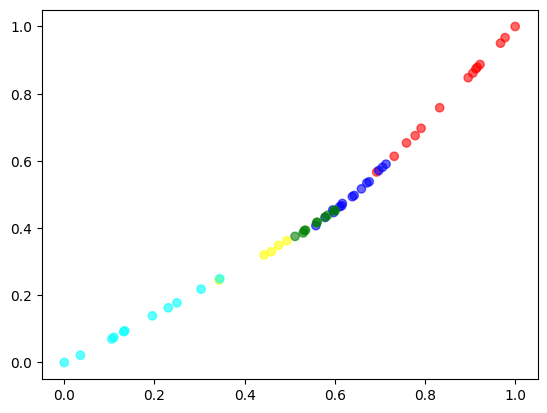

In [58]:
plt.scatter(scale_result_vec[:, 0], scale_result_vec[:, 1], c=colors, marker='o',alpha=0.6)

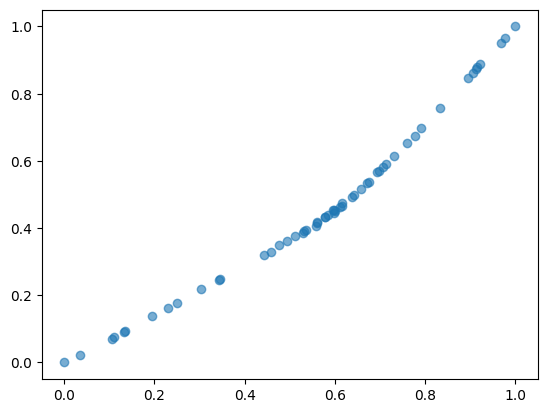

In [59]:
plt.scatter(scale_result_vec[:, 0], scale_result_vec[:, 1], marker='o',alpha=0.6)

In [71]:
scale_result_vec

pc_vec = OrderedDict()
for i in range(1, len(scale_result_vec)+1):
    pc_vec[i] = [scale_result_vec[0], scale_result_vec[1]]
    
pprint.pprint(pc_vec)

NameError: name 'pprint' is not defined

In [61]:
cols = ['x', 'y','distribute_labels_of_computer', 'node_size']
df = pd.DataFrame(index=[], columns=cols)
df["distribute_labels_of_computer"] = node_numbers
df["x"] = scale_result_vec[:, 0]
df["y"] = scale_result_vec[:, 1]
df["node_size"] = node_sizes

In [62]:
df = df.sort_values('distribute_labels_of_computer')

# csvに書き出し
df.to_csv('../data/japanese_network_topology.csv', index=False)

df

,x,y,distribute_labels_of_computer,node_size
0,0.967481,0.950287,1,570
1,0.977573,0.966846,2,631
2,1.000000,1.000000,3,464
3,0.906201,0.861448,4,371
4,0.915827,0.878423,5,814
5,0.912741,0.873637,6,516
6,0.895780,0.847536,7,579
7,0.922048,0.886915,8,458
8,0.832571,0.758216,9,493
9,0.758985,0.653347,10,871
